In [89]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

In [93]:
df = pd.read_csv("../Reshetnyak/data/raw/cancer_reg.csv")
def reduction(x):
    return (x[x.find(", ") + 1:])

def reduction_bin(x):
    x = x.replace("(", "")
    x = x.replace(")", "")
    x = x.replace("]", "")
    x = x.replace("[", "")
    x = x.replace(",", "")
    return (sum(map(float, x.split())) / 2)
    

In [94]:
df['Geography'] = df['Geography'].apply(reduction)

In [95]:
geo = df['Geography']
geo_set = set(geo)

df.Geography = pd.Categorical(df.Geography)
df = df.assign(Geography=df.Geography.cat.codes)

In [98]:
df['binnedInc'] = df['binnedInc'].apply(reduction_bin)
df['binnedInc']

0       23391.1875
1       12383.5000
2       12383.5000
3       10990.6750
4       12383.5000
           ...    
2829    11652.8250
2830    12383.5000
2831    13199.0000
2832    12383.5000
2833    10385.8875
Name: binnedInc, Length: 2834, dtype: float64

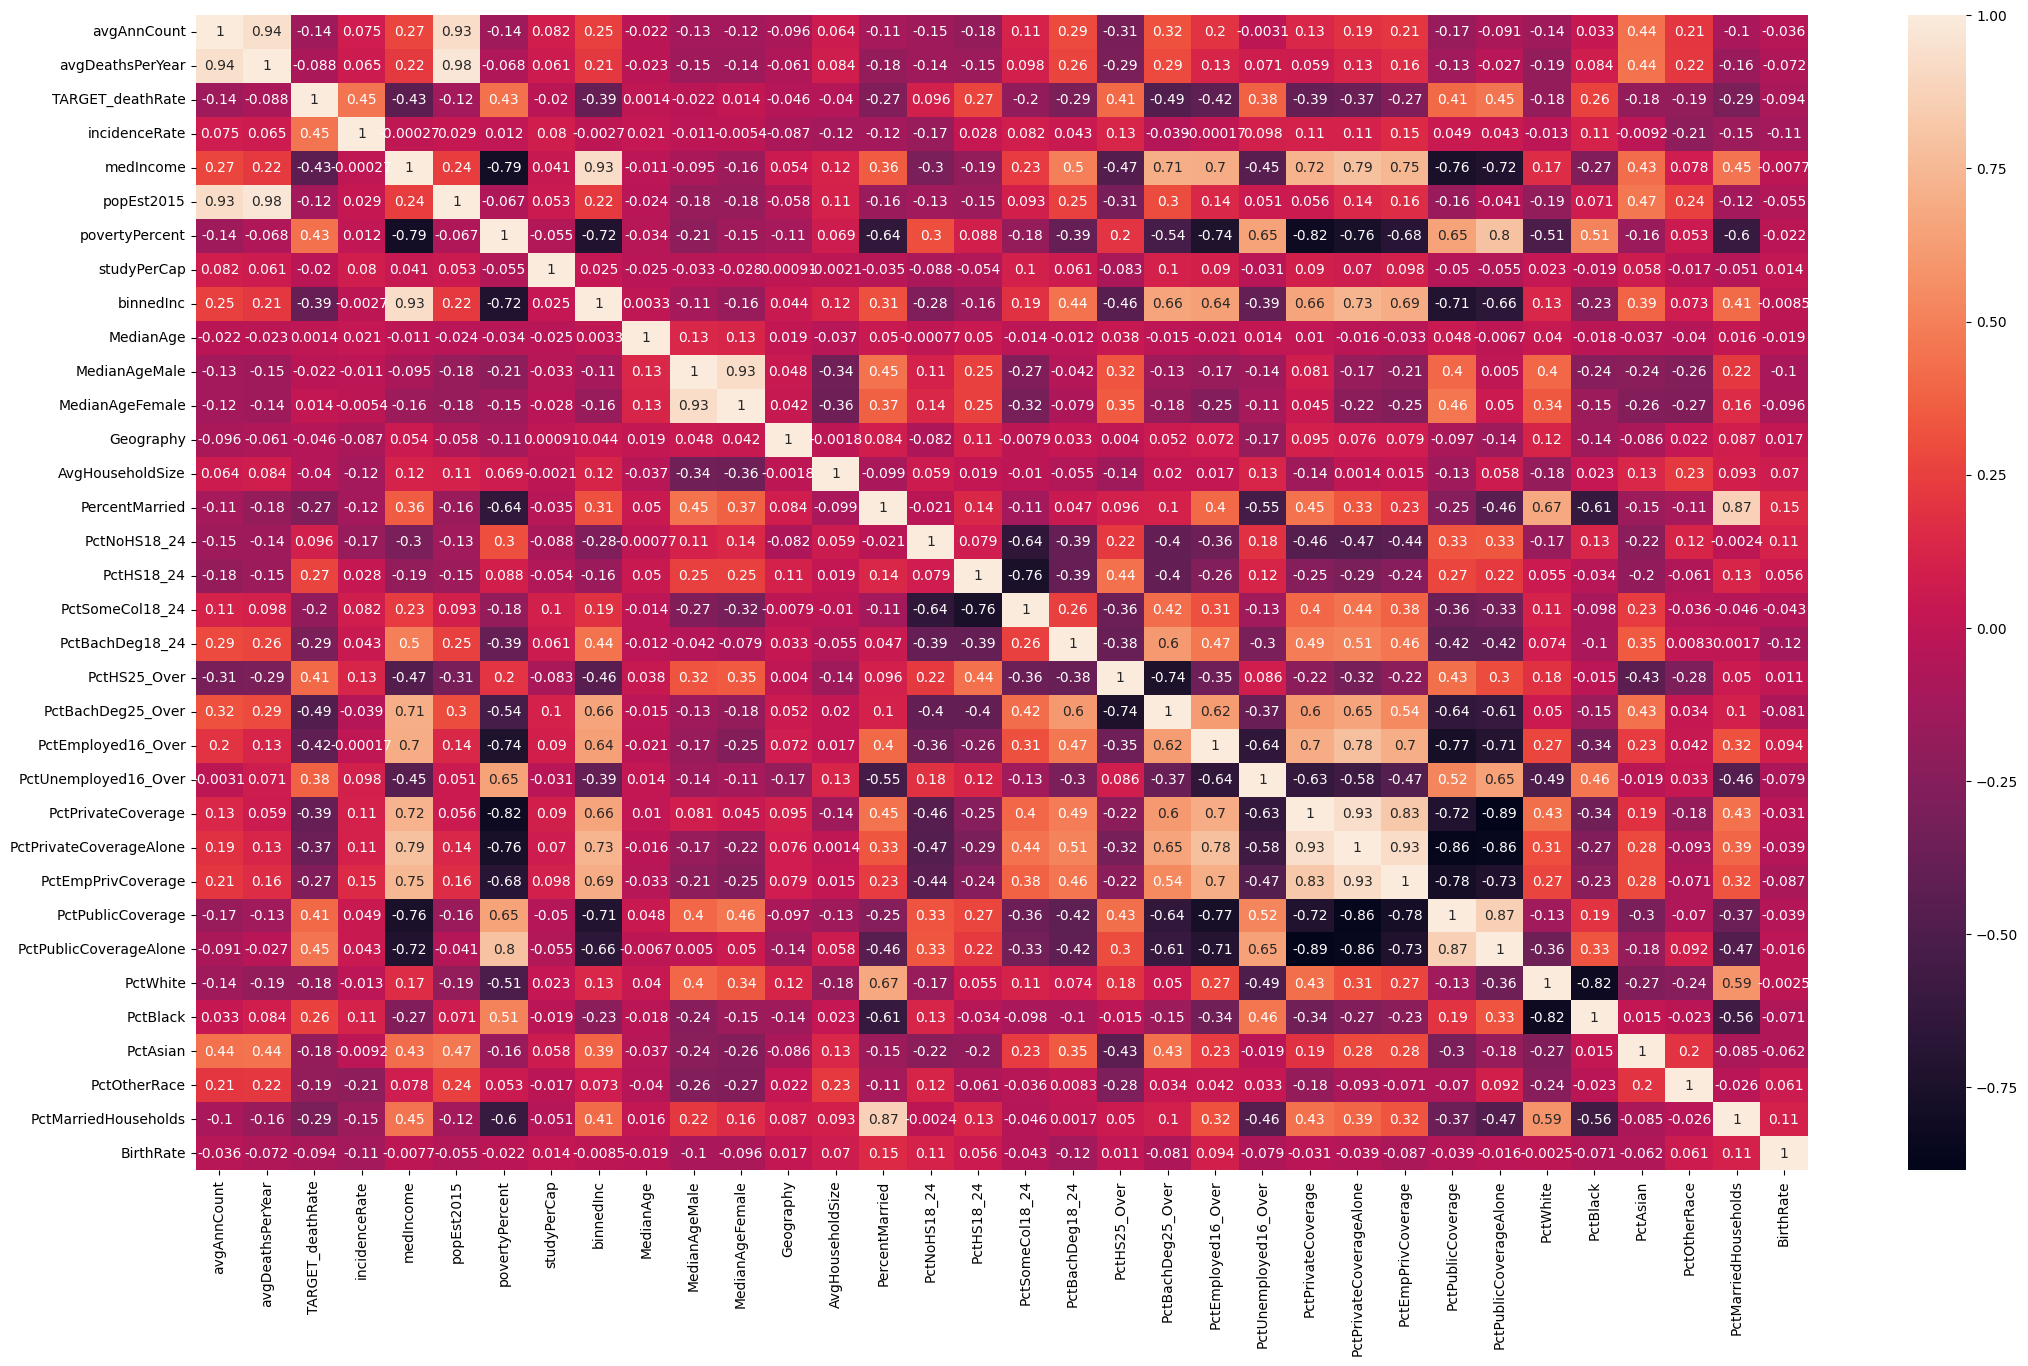

In [99]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(26, 15))
ax = sb.heatmap(corr, annot=True)
plt.show()